In [63]:
import pandas as pd

In [64]:
data = pd.read_csv("trainingdata.csv")

In [65]:
data.columns

Index(['Z', 'Y', 'X', 'xBx', 'yBx', 'zBx', 'xBy', 'yBy', 'zBy', 'xBz', 'yBz',
       'zBz', '|Bx+Bz|', '|By+Bz|', '|Bz|', 'Res'],
      dtype='object')

In [66]:
data

,Z,Y,X,xBx,yBx,zBx,xBy,yBy,zBy,xBz,yBz,zBz,|Bx+Bz|,|By+Bz|,|Bz|,Res
0,1,-10,-10,-4572,7293,5369,-6438,3463,2423,4955,-7471,-4097,1340.282433,4589.730820,9856.636089,12.16
1,1,-10,-9,-2522,9766,5232,-4732,6697,5441,2997,-10038,-3640,1683.470522,4173.260955,11090.223310,12.16
2,1,-10,-8,-1306,10870,4514,-2653,9487,5611,1960,-11247,-2519,2133.042428,3624.681089,11691.106450,12.16
3,1,-10,-7,-440,11187,4114,-1487,10871,4759,1392,-11744,-1597,2748.061499,3281.676096,11933.549720,12.16
4,1,-10,-6,364,11056,4156,-890,11530,4005,1066,-11957,-969,3607.446465,3070.928361,12043.469850,12.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31747,21,10,6,66,49,-120,-64,-30,-233,-232,338,-537,780.367862,880.556642,675.601214,10.40
31748,21,10,7,38,59,-106,-75,-39,-197,-270,322,-505,756.509088,831.816085,656.969558,10.40
31749,21,10,8,15,59,-118,-90,-35,-180,-283,310,-471,744.920130,799.096365,630.896188,10.40
31750,21,10,9,-12,60,-110,-100,-32,-167,-317,287,-432,722.782125,773.120301,607.850310,10.40


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [68]:
X = data.copy()
X=data[['xBx', 'yBx', 'zBx', 'xBy', 'yBy', 'zBy', 'xBz', 'yBz', 'zBz',"|Bx+Bz|","|By+Bz|","|Bz|", "Res"]]

In [69]:
X

,xBx,yBx,zBx,xBy,yBy,zBy,xBz,yBz,zBz,|Bx+Bz|,|By+Bz|,|Bz|,Res
0,-4572,7293,5369,-6438,3463,2423,4955,-7471,-4097,1340.282433,4589.730820,9856.636089,12.16
1,-2522,9766,5232,-4732,6697,5441,2997,-10038,-3640,1683.470522,4173.260955,11090.223310,12.16
2,-1306,10870,4514,-2653,9487,5611,1960,-11247,-2519,2133.042428,3624.681089,11691.106450,12.16
3,-440,11187,4114,-1487,10871,4759,1392,-11744,-1597,2748.061499,3281.676096,11933.549720,12.16
4,364,11056,4156,-890,11530,4005,1066,-11957,-969,3607.446465,3070.928361,12043.469850,12.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31747,66,49,-120,-64,-30,-233,-232,338,-537,780.367862,880.556642,675.601214,10.40
31748,38,59,-106,-75,-39,-197,-270,322,-505,756.509088,831.816085,656.969558,10.40
31749,15,59,-118,-90,-35,-180,-283,310,-471,744.920130,799.096365,630.896188,10.40
31750,-12,60,-110,-100,-32,-167,-317,287,-432,722.782125,773.120301,607.850310,10.40


In [70]:
y = data[["X","Y","Z"]]
y

,X,Y,Z
0,-10,-10,1
1,-9,-10,1
2,-8,-10,1
3,-7,-10,1
4,-6,-10,1
...,...,...,...
31747,6,10,21
31748,7,10,21
31749,8,10,21
31750,9,10,21


In [71]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size = 0.3, shuffle=True)
X_train=X
y_train=y

In [72]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [73]:
X_scaled = scaler.transform(X_train)

In [74]:
# define the keras model
model = Sequential()
model.add(Dense(32, input_shape=(13,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3))

In [75]:
# compile the keras model
model.compile(loss="mse", optimizer='adam', metrics=['accuracy'])

In [76]:
X_scaled.shape

(31752, 13)

In [77]:
model.fit(X_scaled, y_train, epochs=60, batch_size=10)

Epoch 1/60
3176/3176 [==============================] - 4s 1ms/step - loss: 8.0974 - accuracy: 0.9471
Epoch 2/60
3176/3176 [==============================] - 3s 1ms/step - loss: 0.4837 - accuracy: 0.9764
Epoch 3/60
3176/3176 [==============================] - 3s 1ms/step - loss: 0.3005 - accuracy: 0.9782
Epoch 4/60
3176/3176 [==============================] - 3s 1ms/step - loss: 0.2198 - accuracy: 0.9781
Epoch 5/60
3176/3176 [==============================] - 3s 1ms/step - loss: 0.1804 - accuracy: 0.9784
Epoch 6/60
3176/3176 [==============================] - 3s 1ms/step - loss: 0.1592 - accuracy: 0.9785
Epoch 7/60
3176/3176 [==============================] - 3s 1ms/step - loss: 0.1428 - accuracy: 0.9792
Epoch 8/60
3176/3176 [==============================] - 4s 1ms/step - loss: 0.1305 - accuracy: 0.9802
Epoch 9/60
3176/3176 [==============================] - 3s 1ms/step - loss: 0.1224 - accuracy: 0.9803
Epoch 10/60
3176/3176 [==============================] - 3s 1ms/step - loss: 0.113

In [16]:
X_scaled_test = scaler.transform(X_test)

In [17]:
_, accuracy = model.evaluate(X_scaled_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

298/298 [==============================] - 2s 4ms/step - loss: 0.1354 - accuracy: 0.9815
Accuracy: 98.15


In [18]:
y_pred=model.predict(X_scaled_test)
y_pred

298/298 [==============================] - 1s 3ms/step


array([[ 7.145322 , -3.1404798, 18.53619  ],
       [ 1.6946925,  7.250298 ,  5.8175817],
       [10.270876 ,  0.4874558,  7.029634 ],
       ...,
       [ 1.982786 , 10.586061 , 18.26147  ],
       [-2.9047155, -7.636872 , 18.827883 ],
       [-6.9297824, -3.6994774, 11.799559 ]], dtype=float32)

In [19]:
import numpy as np
res=pd.DataFrame()
res[['X','Y','Z']]=y_test
res[['Xpred','Ypred','Zpred']]=y_pred
res[['Xerror', 'Yerror', 'Zerror']]=np.subtract(y_pred,y_test)
# res['N']=NEW_Test['N'].tolist()
res['TotalError']=res.apply(lambda row: np.sqrt(row['Xerror']*row['Xerror'] + row['Yerror']*row['Yerror']+ row['Zerror']*row['Zerror']), axis=1)
spool=res[['Z','Y','X','Zpred','Ypred','Xpred', 'Xerror', 'Yerror', 'Zerror', 'TotalError']]

In [20]:
spool.to_csv('validation_results_allfeats.csv', index=False)

In [21]:
import matplotlib.pyplot as plt
plt.scatter(res['X'],res['Xerror'])

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
plt.scatter(res['Y'],res['Yerror'])

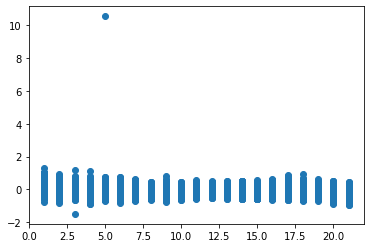

In [22]:
plt.scatter(res['Z'],res['Zerror'])

In [78]:
model.save('modelallfeats.h5')